<a href="https://colab.research.google.com/github/pavanibill/Hotel-booking-data-analysis/blob/main/Pavani_of_Copy_of_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
store_data = pd.read_csv('/content/drive/MyDrive/Data & Resources/Rossmann Stores Data.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
store_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train_data = pd.read_csv('/content/drive/MyDrive/Data & Resources/store.csv')

In [7]:
train_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
combined_data = pd.merge(store_data,train_data, on = 'Store')



In [9]:
combined_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Exploring Data Analysis

In [10]:
combined_data.shape

(1017209, 18)

In [11]:
combined_data.isnull().mean()*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

In [42]:
columns = list(combined_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print('Unique values in column:',combined_data[i].unique())

Unique values in column: [   1    2    3 ... 1113 1114 1115]
Unique values in column: [5 4 3 2 1 7 6]
Unique values in column: [ 5263  5020  4782 ... 20362 18841 21237]
Unique values in column: [ 555  546  523 ... 3727 4022 4106]
Unique values in column: [1 0]
Unique values in column: [1 0]
Unique values in column: ['0' 'a' 'b' 'c']
Unique values in column: [1 0]
Unique values in column: ['c' 'a' 'd' 'b']
Unique values in column: ['a' 'c' 'b']
Unique values in column: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in column: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in column: [0 1]
Unique values in column: [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in column: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in column: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' '

# Data visualization

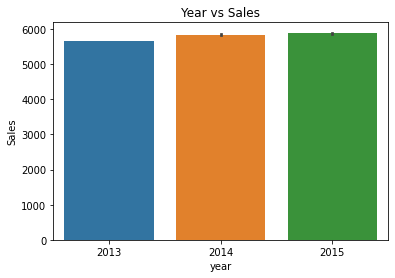

In [43]:
combined_data['year'] = combined_data['Date'].apply(lambda x : int(str(x)[0:4]))
combined_data['month'] = combined_data['Date'].apply(lambda x : int(str(x)[5:7]))
sns.barplot(x='year', y='Sales', data=combined_data).set(title='Year vs Sales')
plt.show()

# Observation:

[Text(0.5, 1.0, 'Sales vs Day of Week')]

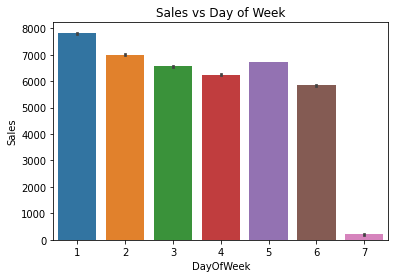

In [25]:
sns.barplot(x='DayOfWeek',y='Sales',data=combined_data).set(title='Sales vs Day of Week')

[Text(0.5, 1.0, 'Sales on Promo')]

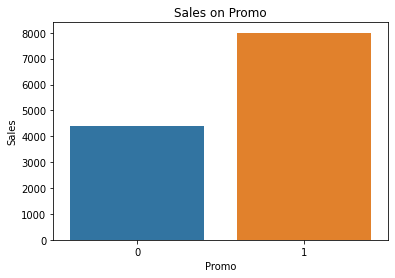

In [26]:
sns.barplot(x='Promo',y='Sales',data=combined_data).set(title='Sales on Promo')

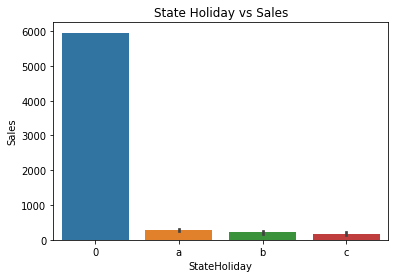

In [29]:
combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'
sns.barplot(x='StateHoliday', y='Sales', data=combined_data).set(title='State Holiday vs Sales')
plt.show()

[Text(0.5, 1.0, 'School Holiday vs Sales')]

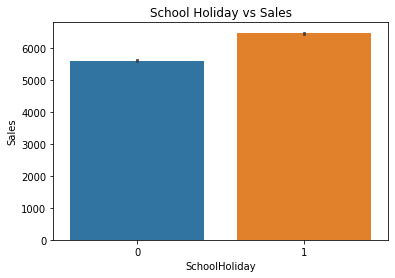

In [30]:
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')

[Text(0.5, 1.0, 'StoreType vs Sales')]

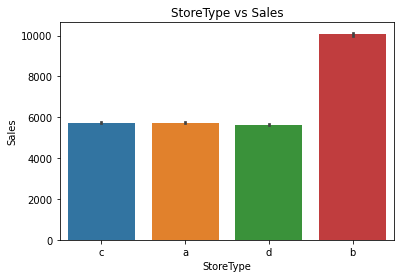

In [31]:
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')

[Text(0.5, 1.0, 'Assortment vs Sale')]

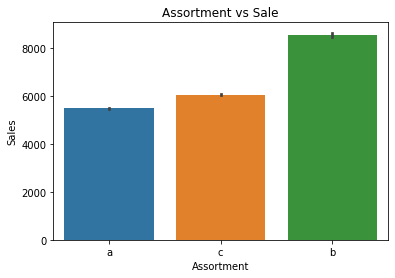

In [34]:
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sale')

In [46]:
store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [48]:
train_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [52]:
store_data.update(store_data['Promo'].fillna(value=0,inplace=True))
store_data.update(store_data['StateHoliday'].fillna(value=0,inplace=True))
store_data.update(store_data['SchoolHoliday'].fillna(value=0,inplace=True))

In [55]:
mean_CompetitionDistance = train_data['CompetitionDistance'].mean()
train_data.update(train_data['CompetitionDistance'].fillna(value=mean_CompetitionDistance,inplace=True))

In [63]:
mode_CompetitionOpenSinceMonth = train_data['CompetitionOpenSinceMonth'].mode()[0]
mode_CompetitionopensinceMonth = train_data['CompetitionOpenSinceYear'].mode()[0]
train_data.update(train_data['CompetitionOpenSinceMonth'].fillna(value=mode_CompetitionOpenSinceMonth,inplace=True))
train_data.update(train_data['CompetitionOpenSinceYear'].fillna(value=mode_CompetitionOpenSinceMonth,inplace=True))
train_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [66]:
combined_data = pd.merge(store_data,train_data,on='Store')
print(combined_data.shape)
combined_data.head(5)

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [67]:
combined_data.isnull().mean()*100

Store                         0.00000
DayOfWeek                     0.00000
Date                          0.00000
Sales                         0.00000
Customers                     0.00000
Open                          0.00000
Promo                         0.00000
StateHoliday                  0.00000
SchoolHoliday                 0.00000
StoreType                     0.00000
Assortment                    0.00000
CompetitionDistance           0.00000
CompetitionOpenSinceMonth     0.00000
CompetitionOpenSinceYear      0.00000
Promo2                        0.00000
Promo2SinceWeek              49.94362
Promo2SinceYear              49.94362
PromoInterval                49.94362
dtype: float64